In [24]:
!pip install kagglehub pandas numpy seaborn matplotlib scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.0 MB/s eta 0:00:00


In [25]:
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [26]:
# Download the latest version of the dataset
path = kagglehub.dataset_download("ehababoelnaga/multiple-disease-prediction")
print("Path to dataset files:", path)

100%|██████████| 285k/285k [00:00<00:00, 7.68MB/s]

Extracting files...
Path to dataset files: /Users/thatikondakinshuk/.cache/kagglehub/datasets/ehababoelnaga/multiple-disease-prediction/versions/1


In [27]:
import os
# List downloaded files
print(os.listdir(path))

['Blood_samples_dataset_balanced_2(f).csv', 'blood_samples_dataset_test.csv']


In [35]:
# Load the dataset
df = pd.read_csv("blood_samples_dataset_test.csv")

# Preview the first 5 rows
print(df.head())

    Glucose  Cholesterol  Hemoglobin  Platelets  White Blood Cells  \
0  0.001827     0.033693    0.114755   0.997927           0.562604   
1  0.436679     0.972653    0.084998   0.180909           0.675736   
2  0.545697     0.324815    0.584467   0.475748           0.558596   
3  0.172994     0.050351    0.736000   0.782022           0.069435   
4  0.758534     0.739968    0.597868   0.772683           0.875720   

   Red Blood Cells  Hematocrit  Mean Corpuscular Volume  \
0         0.866499    0.578042                 0.914615   
1         0.563889    0.798382                 0.670361   
2         0.661007    0.934056                 0.381782   
3         0.085219    0.032907                 0.460619   
4         0.860265    0.486189                 0.486686   

   Mean Corpuscular Hemoglobin  Mean Corpuscular Hemoglobin Concentration  \
0                     0.026864                                   0.038641   
1                     0.376092                                   0.184

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    486 non-null    float64
 1   Cholesterol                                486 non-null    float64
 2   Hemoglobin                                 486 non-null    float64
 3   Platelets                                  486 non-null    float64
 4   White Blood Cells                          486 non-null    float64
 5   Red Blood Cells                            486 non-null    float64
 6   Hematocrit                                 486 non-null    float64
 7   Mean Corpuscular Volume                    486 non-null    float64
 8   Mean Corpuscular Hemoglobin                486 non-null    float64
 9   Mean Corpuscular Hemoglobin Concentration  486 non-null    float64
 10  Insulin                   

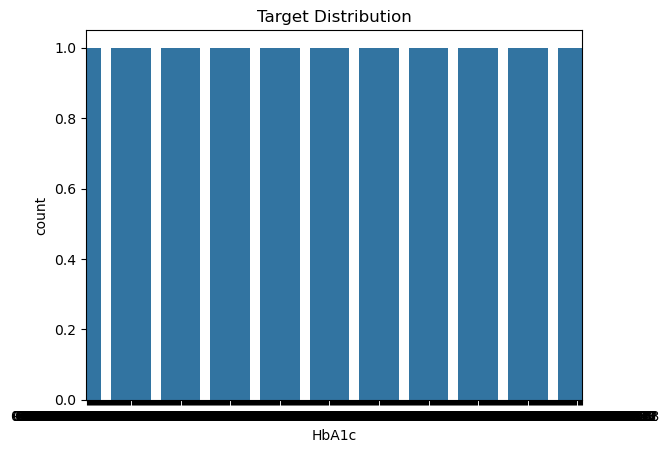

In [39]:
# Basic dataset info
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Visualize target distribution (assuming the target column is named 'disease')
sns.countplot(x='HbA1c', data=df)
plt.title('Target Distribution')
plt.show()


In [42]:
import pandas as pd

# Example dataframe
df = pd.read_csv('blood_samples_dataset_test.csv')

# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Fill missing values with the median for numeric columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Fill missing values for categorical columns using mode
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# Verify the result
print(df.head())



    Glucose  Cholesterol  Hemoglobin  Platelets  White Blood Cells  \
0  0.001827     0.033693    0.114755   0.997927           0.562604   
1  0.436679     0.972653    0.084998   0.180909           0.675736   
2  0.545697     0.324815    0.584467   0.475748           0.558596   
3  0.172994     0.050351    0.736000   0.782022           0.069435   
4  0.758534     0.739968    0.597868   0.772683           0.875720   

   Red Blood Cells  Hematocrit  Mean Corpuscular Volume  \
0         0.866499    0.578042                 0.914615   
1         0.563889    0.798382                 0.670361   
2         0.661007    0.934056                 0.381782   
3         0.085219    0.032907                 0.460619   
4         0.860265    0.486189                 0.486686   

   Mean Corpuscular Hemoglobin  Mean Corpuscular Hemoglobin Concentration  \
0                     0.026864                                   0.038641   
1                     0.376092                                   0.184

In [56]:
# Define features (X) and target (y)
X = df.drop('HbA1c', axis=1)
y = df['HbA1c']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Assuming 'df' is your dataset
X = df.drop('HbA1c', axis=1)  # Features
y = df['HbA1c']  # Target variable (e.g., HbA1c levels)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical and numeric columns
categorical_features = X.select_dtypes(include=['object']).columns  # Categorical columns
numeric_features = X.select_dtypes(include=['number']).columns  # Numeric columns

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numeric_features),  # Handle missing values in numeric columns
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing categorical values
            ('onehot', OneHotEncoder(handle_unknown='ignore'))  # OneHotEncode categorical columns
        ]), categorical_features)
    ])

# Combine preprocessing and the regression model into a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))  # Use RandomForestRegressor for continuous target variable
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Output predictions
print(y_pred)


[0.50276501 0.42505587 0.5261672  0.47675831 0.46077341 0.46442704
 0.49787664 0.35893937 0.49867239 0.53002561 0.52664893 0.50436275
 0.48416448 0.46585806 0.41687369 0.53334946 0.37573353 0.47799815
 0.54220704 0.42383442 0.47668483 0.5445997  0.50574009 0.52174905
 0.48583617 0.51563368 0.45358018 0.45707524 0.47864608 0.58874222
 0.52517316 0.47667365 0.46984532 0.46170394 0.51718901 0.47496207
 0.54522285 0.55141568 0.45178654 0.42797622 0.46490879 0.47416956
 0.4747162  0.54476233 0.59028067 0.53008789 0.59921149 0.40264083
 0.42182967 0.50018136 0.53907694 0.42675123 0.47356959 0.46835421
 0.49015659 0.56884633 0.590326   0.57961768 0.50965653 0.48098593
 0.47185049 0.52129537 0.60195933 0.42991583 0.5053887  0.55758681
 0.35897871 0.55155279 0.58555452 0.52605743 0.52562791 0.61015604
 0.48672698 0.49824092 0.54315323 0.50366798 0.4599526  0.57718327
 0.54893185 0.54236291 0.60658748 0.49114445 0.43531077 0.6021627
 0.45930899 0.50947173 0.51114025 0.45323765 0.51601995 0.60075